#libraries used for this task

In [ ]:
from numpy import cos, sin, zeros, sum, pi, dot, array,identity,linspace, shape,sqrt
import numpy as np
from scipy.integrate import odeint
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import cvxopt
from IPython.display import clear_output
clear_output(wait=True)


Here i have defined the function for first task to calculate following terms
* Jacobian 
* forward kinamatics
* joint velocity
* sysode (for integration)


In [ ]:
def jac(q, l):
    return array([[1, -l[1]*sin(q[1])-l[2]*sin(q[1]+q[2])-l[3]*sin(q[1]+q[2]+q[3]), -l[2]*sin(q[1]+q[2])-l[3]*sin(q[1]+q[2]+q[3]),-l[3]*sin(q[1]+q[2]+q[3])],
                   [0, l[1]*cos(q[1])+l[2]*cos(q[1]+q[2])+l[3]*cos(q[1]+q[2]+q[3]),  l[2]*cos(q[1]+q[2])+l[3]*cos(q[1]+q[2]+q[3]), l[3]*cos(q[1]+q[2]+q[3])]])
def fk(q,l):
  return array([q[0]+l[1]*cos(q[1])+l[2]*cos(q[1]+q[2])+l[3]*cos(q[1]+q[2]+q[3]),\
                     l[1]*sin(q[1])+l[2]*sin(q[1]+q[2])+l[3]*sin(q[1]+q[2]+q[3])])
  

def q_dot(J,x_dot):
  # J_inv = J.T @ np.linalg.inv(J @ J.T) 
  # dq = J_inv@ x_dot
  dq = np.linalg.pinv(J)@x_dot
  return dq


def sysode(q_0, t, l):
    J = jac(q_0,l)

    x_0 = fk(q_0,l)
    v = -sin(2*t),cos(2*t) # for circle trajectory
    dq = q_dot(J, v)
    return dq






* Function to create animation of the trajectory

In [ ]:

link_len = 1.0 # connecting rod length

def fk_cooridnate(q,l):
  x = q[0],q[0]+l*cos(q[1]),q[0]+l*cos(q[1])+l*cos(q[1]+q[2]),q[0]+l*cos(q[1])+l*cos(q[1]+q[2])+l*cos(q[1]+q[2]+q[3])
  y = 0,l*sin(q[1]),l*sin(q[1])+l*sin(q[1]+q[2]),l*sin(q[1])+l*sin(q[1]+q[2])+l*sin(q[1]+q[2]+q[3])
  return x[0],x[1],x[2],x[3],y[0],y[1],y[2],y[3]
def animation_robot(q_sol,link_len,obs,b):

  q1 =q_sol[:,0],q_sol[:,1],q_sol[:,2],q_sol[:,3]
  X0,X1,X2,X3,Y0,Y1,Y2,Y3 = fk_cooridnate(q1,link_len) 
  fig = plt.figure()
  fig.canvas.set_window_title('Matplotlib Animation')
  ax = fig.add_subplot(111, aspect='equal', autoscale_on=False, xlim=(-4,4), ylim=(-2,6))
  ax.grid()
  ax.set_title('PRRR Robot')
  ax.axes.xaxis.set_ticklabels([])
  ax.axes.yaxis.set_ticklabels([])
  ax.plot(np.linspace(-2,2,10),np.zeros(10),'_')
  ax.plot(X3,Y3)
  if(obs=='y'):
    ax.plot(b[0],b[1],"o",markersize=14)
  line, = ax.plot([], [], 'o-', lw=5, color='#de2d26',markerfacecolor = 'white',markeredgewidth = 1.3,markersize = 5)
  line1,= ax.plot([], [], 'bs', color = '#de2d26',lw=3,zorder = 20,markerfacecolor = 'white',markeredgewidth = 1.3,markersize = 5)
  line2,= ax.plot([], [], 'o-', color = 'black',lw=3,zorder = 20,markerfacecolor = 'white',markeredgewidth = 1.3,markersize = 5)
  # initialization function
  def init():
      line.set_data([], [])
      line1.set_data([], [])
      line2.set_data([], [])
      return line,line1,line2
      # animation function
  def animate(i):
      x_points = [X0[i]]
      y_points = [0]
      x_points1 = [X0[i],X1[i],X2[i],X3[i]]
      y_points1 = [0,Y1[i],Y2[i],Y3[i]]
      line2.set_data([X3[i]], Y3[i])
      line1.set_data([X0[i]], [0])
      line.set_data(x_points1, y_points1)
      return line,line1,line2
  # call the animation
  anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(X1), interval=40, blit=True, repeat=False)
  from matplotlib import rc
  rc('animation', html='jshtml')
  return anim
bs=0,0

# Analytical solution 
#Case:1 When D=I and U=0

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


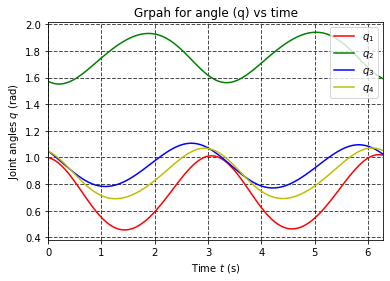

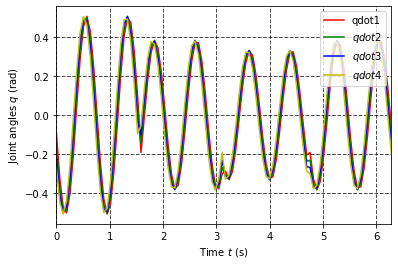

In [ ]:
l= 0,1,1,1
q_0 = 1,pi/2,pi/3,pi/3

t0 = 0 # Initial time 
tf = 2*pi # Final time
N = 1E2 # Numbers of points in time span
t = linspace(t0, tf, int(N)) # Create time span

dq = sysode(q_0, t, l).reshape(100,4)

qdot1, qdot2, qdot3, qdot4=dq[:,0],dq[:,1],dq[:,2],dq[:,3]
q_sol_inv = odeint(sysode, q_0, t, args=(l,))
# # Plotting
from matplotlib.pyplot import *
colors = ('r','g','b','Y')
for i in range(len(q_0)):
  plot(t, q_sol_inv[:,i], label = r'$q_' + str(i+1) + '$', color = colors[i])
legend(loc = 'upper right')
xlim([0, tf])
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ylabel(r'Joint angles $q$ (rad)')
xlabel(r'Time $t$ (s)')
title("Grpah for angle (q) vs time")
show()
# x_dot = diff(x),diff(y)

plot(t, qdot1, label = r'qdot1', color = 'r')
plot(t, qdot2, label = r'$qdot2' '$', color = 'g')
plot(t, qdot3, label = r'$qdot3' '$', color = 'b')
plot(t, qdot4, label = r'$qdot4' '$', color = 'Y')
legend(loc = 'upper right')
xlim([0, tf])
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ylabel(r'Joint angles $q$ (rad)')
xlabel(r'Time $t$ (s)')
show()

* # Calculating the trajectory of the end effector using solution obtained for joint angle using integration 

(100,)


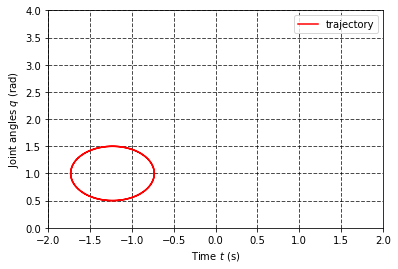

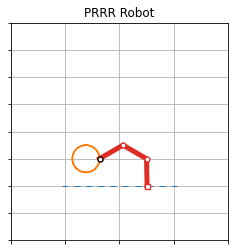

In [ ]:
from numpy import shape

# Forward kinematics
def fk2(q, l):
   fk1= zeros((100, 2))
  #  print(fk1)
   #for k in range(shape(q)[0]):
   for k in range(shape(q)[0]):
     fk1[k,:]=array([q[k,0]+l[1]*cos(q[k,1])+l[2]*cos(q[k,1]+q[k,2])+l[3]*cos(q[k,1]+q[k,2]+q[k,3]) , l[1]*sin(q[k,1])+l[2]*sin(q[k,1]+q[k,2])  +l[3]*sin(q[k,1]+q[k,2]+q[k,3])])
   return fk1
  
pos = fk2(q_sol_inv,l)
x,y=pos[:,0],pos[:,1]
print(x.shape)

colors = ('r','b')
labels = (r'$x$',r'$y$')


plot(x,y, label = "trajectory", color = 'red')
  
legend(loc = 'upper right')
xlim([-2, 2])
ylim([0, 4])
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ylabel(r'Joint angles $q$ (rad)')
xlabel(r'Time $t$ (s)')
show()

obs='n'

anim=animation_robot(q_sol_inv,link_len,obs,bs)
anim

# Analytical solution 
#Case:2 When D=dynamics matrics and U=potential energy
* calculation of gradient of Potential energy
* Calculation of the dynamics matrix
* Calculation of B,C and G matrix as explain for analytical solution in report


In [ ]:

def Gradien_U(q,l,m,g):
  q1,q2,q3,q4 = q[0],q[1],q[2],q[3]
  m1,m2,m3,m4 = m[0],m[1],m[2],m[3]
  l2,l3,l4 = l[1],l[2],l[3]
  return array([0,
       g*l2*m2*cos(q2)/2 + g*m3*(l2*cos(q2) + l3*cos(q2 + q3)/2) + g*m4*(l2*cos(q2) + l3*cos(q2 + q3) + l4*cos(q2 + q3 + q4)/2),
       g*l3*m3*cos(q2 + q3)/2 + g*m4*(l3*cos(q2 + q3) + l4*cos(q2 + q3 + q4)/2),
       g*l4*m4*cos(q2 + q3 + q4)/2])
  
def D_val1(q,m,l):
  q_1,q_2,q_3,q_4 = q[0],q[1],q[2],q[3]
  m_1,m_2,m_3,m_4 = m[0],m[1],m[2],m[3]
  l_1,l_2,l_3 = l[1],l[2],l[3]
  return array([[m_1 + m_2 + m_3 + m_4,
        -l_1*m_2*sin(q_2) + m_3*(-2*l_1*sin(q_2) - 2*l_2*sin(q_2 + q_3))/2 + m_4*(-2*l_1*sin(q_2) - 2*l_2*sin(q_2 + q_3) - 2*l_3*sin(q_2 + q_3 + q_4))/2,
        -l_2*m_3*sin(q_2 + q_3) + m_4*(-2*l_2*sin(q_2 + q_3) - 2*l_3*sin(q_2 + q_3 + q_4))/2,
        -l_3*m_4*sin(q_2 + q_3 + q_4)],
       [-l_1*m_2*sin(q_2) + m_3*(-2*l_1*sin(q_2) - 2*l_2*sin(q_2 + q_3))/2 + m_4*(-2*l_1*sin(q_2) - 2*l_2*sin(q_2 + q_3) - 2*l_3*sin(q_2 + q_3 + q_4))/2,
        m_2*(2*l_1**2*sin(q_2)**2 + 2*l_1**2*cos(q_2)**2)/2 + m_3*((-2*l_1*sin(q_2) - 2*l_2*sin(q_2 + q_3))*(-l_1*sin(q_2) - l_2*sin(q_2 + q_3)) + (l_1*cos(q_2) + l_2*cos(q_2 + q_3))*(2*l_1*cos(q_2) + 2*l_2*cos(q_2 + q_3)))/2 + m_4*((-2*l_1*sin(q_2) - 2*l_2*sin(q_2 + q_3) - 2*l_3*sin(q_2 + q_3 + q_4))*(-l_1*sin(q_2) - l_2*sin(q_2 + q_3) - l_3*sin(q_2 + q_3 + q_4)) + (l_1*cos(q_2) + l_2*cos(q_2 + q_3) + l_3*cos(q_2 + q_3 + q_4))*(2*l_1*cos(q_2) + 2*l_2*cos(q_2 + q_3) + 2*l_3*cos(q_2 + q_3 + q_4)))/2,
        m_3*(-l_2*(-2*l_1*sin(q_2) - 2*l_2*sin(q_2 + q_3))*sin(q_2 + q_3) + l_2*(2*l_1*cos(q_2) + 2*l_2*cos(q_2 + q_3))*cos(q_2 + q_3))/2 + m_4*((-l_2*sin(q_2 + q_3) - l_3*sin(q_2 + q_3 + q_4))*(-2*l_1*sin(q_2) - 2*l_2*sin(q_2 + q_3) - 2*l_3*sin(q_2 + q_3 + q_4)) + (l_2*cos(q_2 + q_3) + l_3*cos(q_2 + q_3 + q_4))*(2*l_1*cos(q_2) + 2*l_2*cos(q_2 + q_3) + 2*l_3*cos(q_2 + q_3 + q_4)))/2,
        m_4*(-l_3*(-2*l_1*sin(q_2) - 2*l_2*sin(q_2 + q_3) - 2*l_3*sin(q_2 + q_3 + q_4))*sin(q_2 + q_3 + q_4) + l_3*(2*l_1*cos(q_2) + 2*l_2*cos(q_2 + q_3) + 2*l_3*cos(q_2 + q_3 + q_4))*cos(q_2 + q_3 + q_4))/2],
       [-l_2*m_3*sin(q_2 + q_3) + m_4*(-2*l_2*sin(q_2 + q_3) - 2*l_3*sin(q_2 + q_3 + q_4))/2,
        m_3*(-2*l_2*(-l_1*sin(q_2) - l_2*sin(q_2 + q_3))*sin(q_2 + q_3) + 2*l_2*(l_1*cos(q_2) + l_2*cos(q_2 + q_3))*cos(q_2 + q_3))/2 + m_4*((-2*l_2*sin(q_2 + q_3) - 2*l_3*sin(q_2 + q_3 + q_4))*(-l_1*sin(q_2) - l_2*sin(q_2 + q_3) - l_3*sin(q_2 + q_3 + q_4)) + (2*l_2*cos(q_2 + q_3) + 2*l_3*cos(q_2 + q_3 + q_4))*(l_1*cos(q_2) + l_2*cos(q_2 + q_3) + l_3*cos(q_2 + q_3 + q_4)))/2,
        m_3*(2*l_2**2*sin(q_2 + q_3)**2 + 2*l_2**2*cos(q_2 + q_3)**2)/2 + m_4*((-2*l_2*sin(q_2 + q_3) - 2*l_3*sin(q_2 + q_3 + q_4))*(-l_2*sin(q_2 + q_3) - l_3*sin(q_2 + q_3 + q_4)) + (l_2*cos(q_2 + q_3) + l_3*cos(q_2 + q_3 + q_4))*(2*l_2*cos(q_2 + q_3) + 2*l_3*cos(q_2 + q_3 + q_4)))/2,
        m_4*(-l_3*(-2*l_2*sin(q_2 + q_3) - 2*l_3*sin(q_2 + q_3 + q_4))*sin(q_2 + q_3 + q_4) + l_3*(2*l_2*cos(q_2 + q_3) + 2*l_3*cos(q_2 + q_3 + q_4))*cos(q_2 + q_3 + q_4))/2],
       [-l_3*m_4*sin(q_2 + q_3 + q_4),
        m_4*(-2*l_3*(-l_1*sin(q_2) - l_2*sin(q_2 + q_3) - l_3*sin(q_2 + q_3 + q_4))*sin(q_2 + q_3 + q_4) + 2*l_3*(l_1*cos(q_2) + l_2*cos(q_2 + q_3) + l_3*cos(q_2 + q_3 + q_4))*cos(q_2 + q_3 + q_4))/2,
        m_4*(-2*l_3*(-l_2*sin(q_2 + q_3) - l_3*sin(q_2 + q_3 + q_4))*sin(q_2 + q_3 + q_4) + 2*l_3*(l_2*cos(q_2 + q_3) + l_3*cos(q_2 + q_3 + q_4))*cos(q_2 + q_3 + q_4))/2,
        m_4*(2*l_3**2*sin(q_2 + q_3 + q_4)**2 + 2*l_3**2*cos(q_2 + q_3 + q_4)**2)/2]])

def C_mat(w_p,u_grad):
  C=w_p*u_grad
  return C

def B_mat(j,wk,D):
  B=np.linalg.inv(j@np.linalg.inv(wk*D)@j.T)  
  return B

def G_mat(B,j,wk,D):
  G=np.linalg.inv(wk*D)@j.T@B
  return G

def q_dot(G,j,x_dot,wk,D,C):
  dq= G@x_dot +(np.identity(4)-G@j)@np.linalg.inv(wk*D)@C 
  return dq


def sysode(q_0, t, l,m):
    wk= 1
    wp= 0.5
    x_dot = t,t#-sin(t),cos(t)
    j = jac(q_0,l)
    u_grad = Gradien_U(q_0,l,m,g)#zeros(4)#
    D =  D_val1(q_0,l,m)
    C = C_mat(wp,u_grad)
    B = B_mat(j,wk,D)
    G = G_mat(B,j,wk,D)
    dq = q_dot(G,j,x_dot,wk,D,C)
    return dq

# Implementation and graph for joint angle

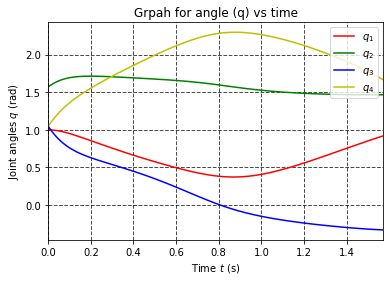

In [ ]:
g = 9.8
m = 1,1,1,1
l= 1,1,1,1
q_0 = 1,pi/2,pi/3,pi/3


t0 = 0 # Initial time 
tf = pi/2# Final time
N = 100# Numbers of points in time span
t = linspace(t0, tf, int(N)) # Create time span




q_sol_inv2 = odeint(sysode, q_0, t, args=(l,m))
from matplotlib.pyplot import *
colors = ('r','g','b','Y')
for i in range(len(q_0)):
  plot(t, q_sol_inv2[:,i], label = r'$q_' + str(i+1) + '$', color = colors[i])
legend(loc = 'upper right')
xlim([0, tf])
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ylabel(r'Joint angles $q$ (rad)')
xlabel(r'Time $t$ (s)')
title("Grpah for angle (q) vs time")
show()


# Trajectory path and animation for this task

(100,)


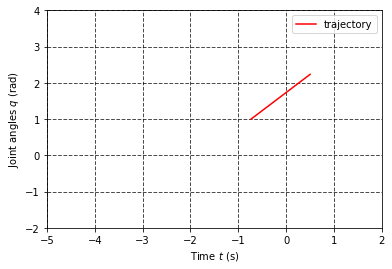

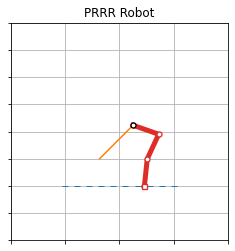

In [ ]:
pos = fk2(q_sol_inv2,l)
x,y=pos[:,0],pos[:,1]
print(x.shape)

colors = ('r','b')
labels = (r'$x$',r'$y$')


plot(x,y, label = "trajectory", color = 'red')
  
legend(loc = 'upper right')
xlim([-5, 2])
ylim([-2, 4])
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ylabel(r'Joint angles $q$ (rad)')
xlabel(r'Time $t$ (s)')
show()

anim=animation_robot(q_sol_inv2,link_len,obs=='n',bs)
anim

* # Modification of the  algorithm given that joint velocities are bounded $\dot{\mathbf{q}}_{min}  \leq \dot{\mathbf{q}} \leq \dot{\mathbf{q}}_{max}$ 
 
 Now the joints velocities are bounded with following constaint
\begin{equation}
   \dot{\mathbf{q}}_{min}  \leq \dot{\mathbf{q}} \leq \dot{\mathbf{q}}_{max}
\end{equation}
 our problem has been not linear , it would be solved by using quadratic technique . In order to solve this problem ,i have used the quadratic solver function.  standard form of CVXOPT function is following :
\begin{equation}
    min_x \frac{1}{2} x^T P x + q^T x
\end{equation}
\begin{equation}
    Ax = b 
\end{equation}
\begin{equation}
    G(x)<=h
\end{equation}
Our problem with bounded constraint is given below 
 

\begin{equation}
    min_x J_c = \omega_k \frac{1}{2} \dot{q}^T D \dot{q} + \omega_p \delta{U}^T \dot{q}
\end{equation}
\begin{equation}
  \dot{x} = J \dot{q}
\end{equation}
\begin{equation}
  \dot{q} < \dot{q_{max}}
\end{equation}
\begin{equation}
      -\dot{q} < -\dot{q_{min}}
\end{equation}
by comparing our system with standard form of the CVXOPT the these constraint
P,Q,A,x,b,G,h has following values

$P = D , q^T = \delta{U}^T , A = J , b = \dot{x} , x = \dot{q}$

G is a 8X4  matrix, which is the stack of two 4x4 identity matrix, where  x are equal to joint velocity with dimension  4X1, which makes it equal to 8X1 matrix with four maximum and four minimum values of $\dot{q}$.

\begin{equation}
 \begin{bmatrix}
  1&0&0&0\\0&1&0&0\\0&0&1&0\\0&0&0&1 \\ -1&0&0&0\\0&-1&0&0\\0&0&-1&0\\0&0&0&-1
 \end{bmatrix}\begin{bmatrix}
 \dot{q_1} \\ \dot{q_2} \\ \dot{q_3} \\ \dot{q_4}
 \end{bmatrix} = \begin{bmatrix}
 \dot{q_1}_{max}\\\dot{q_2}_{max}\\\dot{q_3}_{max}\\\dot{q_4}_{max} \\ -\dot{q_1}_{min} \\-\dot{q_2}_{min} \\-\dot{q_3}_{min} \\-\dot{q_4}_{min} 
 \end{bmatrix}
\end{equation}


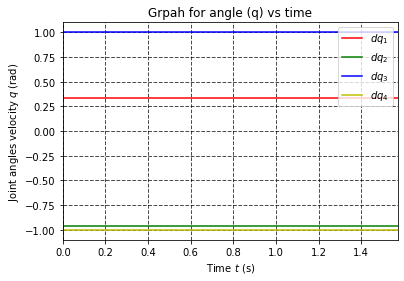

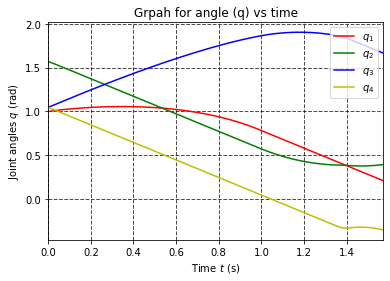

In [ ]:

def cvxopt_solve_qp(P, q, G=None, h=None, A=None, b=None):
    args = [cvxopt.matrix(P), cvxopt.matrix(q)]
    if G is not None:
        args.extend([cvxopt.matrix(G), cvxopt.matrix(h)])
        if A is not None:
            args.extend([cvxopt.matrix(A), cvxopt.matrix(b)])
    sol = cvxopt.solvers.qp(*args)
    if 'optimal' not in sol['status']:
        return None
    return array(sol['x']).reshape((P.shape[1],))

def q_dot_opt(q_0,l,m,x_dot,q_min,q_max):
  P = D_val1(q_0,m,l)
  q = Gradien_U(q_0,l,m,g)
  A = jac(q_0,l)
  b = x_dot
  h = np.hstack((q_max,-1*q_min))
  G = np.vstack((identity(4),-identity(4)))
  print(G)
  q_dot = cvxopt_solve_qp(P,q,G,h,A,b)
  return q_dot

def sysode_opt(q_0, t, l,m):

  x_dot= array([0.8,0.8])#-sin(t),cos(t)
  q_max = array([1.0,1.0,1.0,1.0])
  q_min = array([-1.0,-1.0,-1.0,-1.0])

  dq = q_dot_opt(q_0,l,m,x_dot,q_min,q_max)
  return dq


g = 9.8
m = 1,1,1,1
l= 0,1,1,1
q_0 =1,pi/2,pi/3,pi/3


t0 = 0 # Initial time 
tf = pi/2# Final time
N = 100 # Numbers of points in time span
t = linspace(t0, tf, int(N)) # Create time span
#qqd=q_dot_opt(q_0,l,m,x_dot,q_min,q_max)
#qdd=sysode_opt(q_0, t, l,m)
q_dot=[]
for i in range(N):
  q_dottt = sysode_opt(q_0,t[i],l,m)
  q_dot.append(q_dottt)
q_dot1=np.array(q_dot)


q_sol_opt = odeint(sysode_opt, q_0, t, args=(l,m))
from IPython.display import clear_output
clear_output()

from matplotlib.pyplot import *
colors = ('r','g','b','Y')
for i in range(len(q_0)):
  plot(t, q_dot1[:,i], label = r'$dq_' + str(i+1) + '$', color = colors[i])
legend(loc = 'upper right')
xlim([0, tf])
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ylabel(r'Joint angles velocity $q$ (rad)')
xlabel(r'Time $t$ (s)')
title("Grpah for angle (q) vs time")
show()
from matplotlib.pyplot import *
colors = ('r','g','b','Y')
for i in range(len(q_0)):
  plot(t, q_sol_opt[:,i], label = r'$q_' + str(i+1) + '$', color = colors[i])
legend(loc = 'upper right')
xlim([0, tf])
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ylabel(r'Joint angles $q$ (rad)')
xlabel(r'Time $t$ (s)')
title("Grpah for angle (q) vs time")
show()


## Trajectory path and animation for for bounded constraint

(100,)


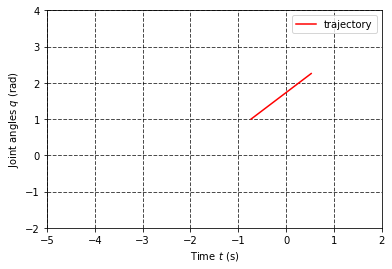

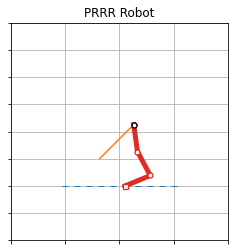

In [ ]:
pos = fk2(q_sol_opt,l)
x,y=pos[:,0],pos[:,1]
print(x.shape)

colors = ('r','b')
labels = (r'$x$',r'$y$')


plot(x,y, label = "trajectory", color = 'red')
  
legend(loc = 'upper right')
xlim([-5, 2])
ylim([-2, 4])
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ylabel(r'Joint angles $q$ (rad)')
xlabel(r'Time $t$ (s)')
show()
b=0,0
anim=animation_robot(q_sol_opt,link_len,obs=='n',b)
anim

# Modification to tackle Integration Drift

he small modification we did helped us in achieve the make the integration more fast and universal we will following constraint in the equation:

  
 \begin{equation}
\begin{aligned}
   &\quad \underset{\dot{q}} {\text{min}}   \mathcal{J}_c = w_k\frac{1}{2}\dot{\mathbf{q}}^T \mathbf{D}(\mathbf{q})\dot{\mathbf{q}} + ||{\dot{x}-J(q) \dot{q} }|| ^2 \\ 
  &\quad S.T :\quad \dot{\mathbf{q}}_{min}  \leq \dot{\mathbf{q}} \leq \dot{\mathbf{q}}_{max}
  \end{aligned}
\end{equation}

\begin{equation}
 \begin{aligned}
||{\dot{x}-J(q) \dot{q} }|| ^2 &\quad =  (\dot{x}-J(q) \dot{q} )^T(\dot{x}-J(q) \dot{q} )\\
&\quad= \dot{q}^T JJ^T \dot{q} -  \dot{x}^TJ\dot{q} - \dot{q} ^T J^T \dot{x}+\dot{x}^T\dot{x}\\
&\quad= 1/2 \dot{q}^T JJ^T \dot{q}-1/2  \dot{x}^TJ\dot{q} - \dot{q} ^T J^T \dot{x}\\
&\quad= 1/2 \dot{q}^T JJ^T \dot{q}- \dot{x}^TJ\dot{q} 
 \end{aligned}
\end{equation}
 to overcome the error between end effector initial position to desired position we will introduce the following error term 
Let 
  \begin{equation}
 e = x_d - x_{in} \\
 \dot{e} = \dot{x_d} - \dot{x_{in} }
 \end{equation}

where $\dot{e} + K e = 0$  
\begin{equation}
 e = x_d - x_{in} \\
 \dot{e} = -k(\dot{x_d} - \dot{x_{in} })
 \end{equation}
  
 K is a positive definite (usually diagonal) matrix, the system (3.71) is asymptotically stable. The error tends to zero along the trajectory with a convergence rate that depends on the eigenvalues of matrix K, the larger the eigenvalues, the faster the convergence, and end effector will follow the trajectory and reached the final position with more accurately.
thus final  cost function will be following

\begin{equation}
\begin{aligned}
   &\quad \underset{\dot{q}} {\text{min}}   \mathcal{J}_c = w_k\frac{1}{2}\dot{\mathbf{q}}^T (\mathbf{D}(\mathbf{q})+J^TJ)\dot{\mathbf{q}} + (\nabla U-K(\dot{x_d} - \dot{x_{in} }))\\ 
  &\quad S.T :\quad \dot{\mathbf{q}}_{min}  \leq \dot{\mathbf{q}} \leq \dot{\mathbf{q}}_{max}
  \end{aligned}
\end{equation}



 


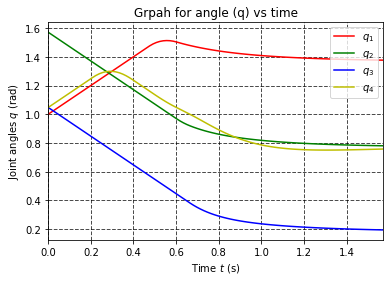

In [ ]:
def q_dot_opt1(q_0,l,m,x_dot,q_min,q_max):
  wp,wk,k = 1,1,1
  J = jac(q_0,l)
  
  P = wk*D_val1(q_0,m,l)+J.T@J
  # u=wp*Gradien_U(q_0,l,m,g)
  q =  -k*(x_dot.T@J)

  h = np.hstack((q_max,-1*q_min))
  G = np.vstack((identity(4),-identity(4)))
  q_dot = cvxopt_solve_qp(P,q,G,h)
  return q_dot

def sysode_opt1(q_0, t, l,m):
  
  x01 = fk(q_0,l)
  xd1 = 2.5,2.5
  k1 = 10
  vd =0 #xd-x0)/tf
  ve = k1*(xd1-x01)
  
  x_dot = ve
  q_max = array([1.0,1.0,1.0,1.0])
  q_min = array([-1.0,-1.0,-1.0,-1.0])#-1.0#-1.0,-1.0,-1.0,-1.0

  dq = q_dot_opt1(q_0,l,m,x_dot,q_min,q_max)
  return dq

g = 9.8
m = 1,1,1,1
l= 0,1,1,1
q_0 =1,pi/2,pi/3,pi/3


t0 = 0 # Initial time 
tf = pi/2 # Final time
N = 1E2 # Numbers of points in time span
t = linspace(t0, tf, int(N)) # Create time span
q_sol1 = odeint(sysode_opt1, q_0, t, args=(l,m))
from IPython.display import clear_output
clear_output()

from matplotlib.pyplot import *
colors = ('r','g','b','Y')
for i in range(len(q_0)):
  plot(t, q_sol1[:,i], label = r'$q_' + str(i+1) + '$', color = colors[i])
legend(loc = 'upper right')
xlim([0, tf])
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ylabel(r'Joint angles $q$ (rad)')
xlabel(r'Time $t$ (s)')
title("Grpah for angle (q) vs time")

show()

#Trajectory path and animation for for drift integration

intial position is [-0.73205081  1.        ]
final_point is [2.48677069 2.51827119]


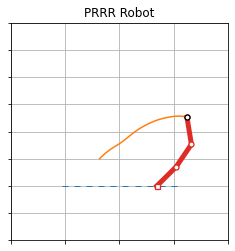

In [ ]:
print('intial position is',fk(q_sol1[0],l))
print('final_point is',fk(q_sol1[-1],l))
anim=animation_robot(q_sol1,link_len,obs=='n',b)
anim 

#Bonus task

#Path planning using confuguration potential field
The basic idea behind the potential field approaches is as follows. The robot
is treated as a point particle in the configuration space, under the influence of an artificial potential field U. The field U is constructed so that the robot is attracted to the final configuration, $q_{final}$, while being repelled from the boundaries of obstacle. If U is constructed appropriately, there will be a single global minimum of U at $q_{final}$, and no local minima
the potential field be given in following formula
\begin{equation}
U_{field}=U_{attract}+U_{repel}
\end{equation}
* # Attarctive potential field
for attractive potential field we the need the already used the formula in above task which increased the speed of convergence of so the attractive field will be following 
\begin{equation}
U_{attarct}=k(x_d−x_in)  
\end{equation}
where $x_d$ is desired position and $x_{in}$ is the intial position of the end effector
* # Repulsive potential field
 the repulsive field should  repel the robot from obstacles, never allowing the robot to collide with an obstacle,
and, when the robot is far away from an obstacle, that obstacle should exert
little or no influence on the motion of the robot. One way to achieve this is to
define a potential that goes to infinity at obstacle boundaries, and drops to zero
The following formula is used for repulsive field
\begin{equation}
U_{repulsive}=\eta (\frac{1}{\rho(q)}-\frac{1}{\rho_0})\frac{1}{\rho(q)^2}.\frac{x_{in}-b}{||x_{in}-b||}  :\rho(q)\leq\rho_0  
\end{equation}
otherwise $U_{repulsive}=0$
i have calculated the repulsive force for end effector and for each link separetily, and after that i have added them to get comibne force at each link
\begin{equation}
U_{rep-total}=U_{rep1}+U_{rep2}+U_{rep3}
\end{equation}

Here below i have define the function of forward kinematics for each link separetely, to calculate the repulsive force for each link

In [ ]:
 def fk_3link(q,l):
  return array([q[0]+l[1]*cos(q[1])+l[2]*cos(q[1]+q[2]),\
                     l[1]*sin(q[1])+l[2]*sin(q[1]+q[2])])
def fk_2link(q,l):
  return array([q[0]+l[1]*cos(q[1]),\
                     l[1]*sin(q[1])])

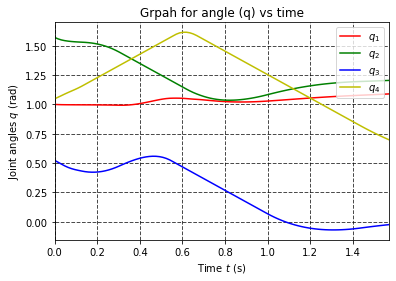

intial position is [-0.5        1.8660254]
final_point is [1.5253612  2.81169163]


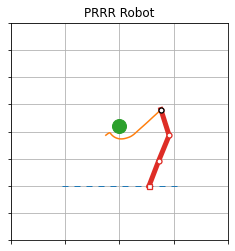

In [ ]:
def q_dot_opt(q_0,l,m,x_dot,q_min,q_max):
  wp,wk,k = 1,1,1
  J = jac(q_0,l)
  
  P = wk*D_val1(q_0,m,l)+J.T@J
  q =  -k*(x_dot.T@J)#+field.T

  h = np.hstack((q_max,-1*q_min))
  G = np.vstack((identity(4),-identity(4)))
  q_dot = cvxopt_solve_qp(P,q,G,h)
  return q_dot
def repulse_field(q_i, xb,p0,k=1):

  x =  fk(q_i,l) -xb 
  dist = np.linalg.norm(x)
  if(dist<=p0):
    rep = k*((1/dist - 1/p0)/dist**2 )*(x/dist)
  else:
    rep=0
  return rep


def sysode_opt(q_0, t, l,m,xb,xd):
  
  x0 = fk(q_0,l)
  
  k1 = 5
  p0=2
  
  #rep= (x0-xb)/np.linalg.norm(x0-xb)
  rep=repulse_field(q_0, xb,2,k=1)
  print(rep)
  ve = k1*(xd-x0)
  x_dot = ve+rep
  q_max = array([1.0,1.0,1.0,1.0])
  q_min = array([-1.0,-1.0,-1.0,-1.0])
  dq = q_dot_opt(q_0,l,m,x_dot,q_min,q_max)
  return dq
xb=0,2.2
xd=1.6,3
g = 9.8
m = 1,1,1,1
l= 0,1,1,1
q_0 =1,pi/2,pi/6,pi/3


t0 = 0 # Initial time 
tf = pi/2 # Final time
N = 1E2 # Numbers of points in time span
t = linspace(t0, tf, int(N)) # Create time span
q_sol = odeint(sysode_opt, q_0, t, args=(l,m,xb,xd))
from IPython.display import clear_output
clear_output()

from matplotlib.pyplot import *
colors = ('r','g','b','Y')
for i in range(len(q_0)):
  plot(t, q_sol[:,i], label = r'$q_' + str(i+1) + '$', color = colors[i])
legend(loc = 'upper right')
xlim([0, tf])
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ylabel(r'Joint angles $q$ (rad)')
xlabel(r'Time $t$ (s)')
title("Grpah for angle (q) vs time")
show()
print('intial position is',fk(q_sol[0],l))
print('final_point is',fk(q_sol[-1],l))
obs='y'
anim=animation_robot(q_sol,link_len,obs,xb)
anim 